conda install -c conda-forge librosa

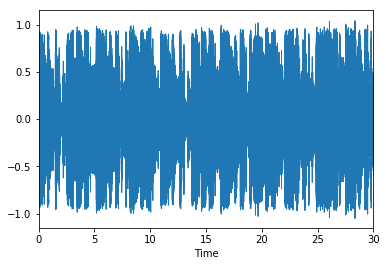

In [5]:
import librosa.display
%matplotlib inline

# Load a flac file from 0(s) to 60(s) and resample to 4.41 KHz
filename = 'wav/2Mm9FCqnjH9k6JfOvr3Hg7.wav'
y, sr = librosa.load(filename, offset=0.0, duration=30.0)
librosa.display.waveplot(y=y, sr=sr)

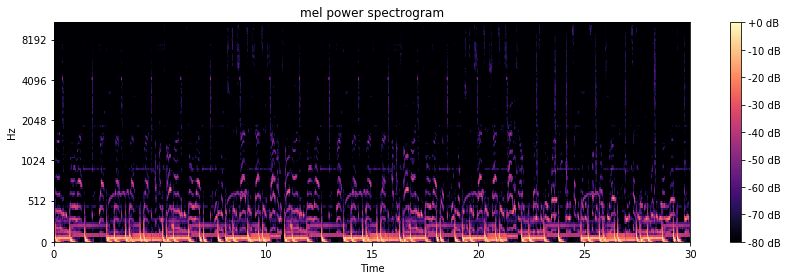

In [15]:
import matplotlib.pyplot  as plt
import numpy as np

y, sr = librosa.load("wav/2Mm9FCqnjH9k6JfOvr3Hg7.wav")

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.amplitude_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

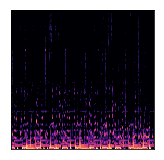

In [4]:
import librosa.display
import matplotlib.pyplot  as plt
import numpy as np

y, sr = librosa.load("wav/2Mm9FCqnjH9k6JfOvr3Hg7.wav")

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.amplitude_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(2.56, 2.56))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
a = librosa.display.specshow(log_S, sr=sr) #, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
#plt.title('mel power spectrogram')

# draw a color bar
#plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
#plt.show()
plt.savefig("aa.png")

In [1]:
import os
import librosa.display
import matplotlib.pyplot  as plt
import numpy as np

def wav2spec(wvpath, pngpath, size):
    datadir = os.listdir(wvpath)
    for file in datadir:
        if file[-3:] == 'wav':
            tempath = os.path.join(wvpath, file)
            y, sr = librosa.load(tempath)
            S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

            # Convert to log scale (dB). We'll use the peak power as reference.
            log_S = librosa.amplitude_to_db(S, ref=np.max)

            # Make a new figure
            plt.figure(figsize=(size/100, size/100))
            librosa.display.specshow(log_S, sr=sr)
            plt.savefig(os.path.join(pngpath, file[:-3]+'png'), dpi=100)
            plt.close()


In [ ]:
wav2spec('wav', 'spec256', 256)

In [1]:
import os
import librosa.display
import matplotlib.pyplot  as plt
import numpy as np

def wav2spec_file(wvpath, pngpath, size):
    datadir = os.listdir(wvpath)
    for file in datadir:
        if file[-3:] == 'wav' and not os.path.isfile(os.path.join(pngpath, file[:-3]+'png')):
            tempath = os.path.join(wvpath, file)
            y, sr = librosa.load(tempath)
            S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

            # Convert to log scale (dB). We'll use the peak power as reference.
            log_S = librosa.amplitude_to_db(S, ref=np.max)

            # Make a new figure
            plt.figure(figsize=(size/100, size/100))
            librosa.display.specshow(log_S, sr=sr)
            plt.savefig(os.path.join(pngpath, file[:-3]+'png'), dpi=100)
            plt.close()

In [2]:
wav2spec_file('wav', 'spec', 256)